##imports


In [ ]:
import io
import random
import string
import warnings
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')


import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *


# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


# python imports
import re
import json
import os
from collections import Counter
import datetime as dt



# Visualization
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud
from tqdm import tqdm_notebook


# Saving models
import pickle

##data loading


In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/323 final/analysis data/Data/Class_wise_cyberbully_2021.csv")
df=pd.read_csv("/content/drive/MyDrive/323 final/analysis data/Data/USA_ELECTION.csv")
df=pd.read_csv("/content/drive/MyDrive/323 final/analysis data/Data/concern-wise/concern_wise_cyberbully.csv")
df2=pd.read_csv("/content/drive/MyDrive/323 final/analysis data/Data/Class_wise_cyberbully_2020.csv")

#df=pd.concat([df1,df2],ignore_index=True)

In [ ]:
df.head()

,Unnamed: 0,index,Datetime,Text,lang,class,label
0,0,0,2021-12-31 18:37:06+00:00,so finally decided buy new clothes durga puja ...,en,0,Attacking
1,1,1,2021-12-31 18:24:42+00:00,acha yearly durga puja k time,en,2,Neutral
2,2,2,2021-12-31 13:13:00+00:00,a year hindu genocide we respectfully remembe...,en,2,Neutral
3,3,3,2021-12-31 13:06:51+00:00,thank dadurga puja er pore ekta like pelam te ...,en,2,Neutral
4,4,4,2021-12-31 11:08:40+00:00,this meant mock else people right criticise ba...,en,0,Attacking


In [ ]:
df['tweet']=df['Text']
df.head()


,Unnamed: 0,index,Datetime,Text,lang,class,label,tweet
0,0,0,2021-12-31 18:37:06+00:00,so finally decided buy new clothes durga puja ...,en,0,Attacking,so finally decided buy new clothes durga puja ...
1,1,1,2021-12-31 18:24:42+00:00,acha yearly durga puja k time,en,2,Neutral,acha yearly durga puja k time
2,2,2,2021-12-31 13:13:00+00:00,a year hindu genocide we respectfully remembe...,en,2,Neutral,a year hindu genocide we respectfully remembe...
3,3,3,2021-12-31 13:06:51+00:00,thank dadurga puja er pore ekta like pelam te ...,en,2,Neutral,thank dadurga puja er pore ekta like pelam te ...
4,4,4,2021-12-31 11:08:40+00:00,this meant mock else people right criticise ba...,en,0,Attacking,this meant mock else people right criticise ba...


In [ ]:
df['tweet'] = df['tweet'].str.replace(',', '')

In [ ]:
df['tweet'] = df['tweet'].str.replace('\'', '')


In [ ]:
df["label"].value_counts()

Neutral      253819
Attacking    160937
Misogyny       2978
Racism         2268
Name: label, dtype: int64

##Date wise_bar plot

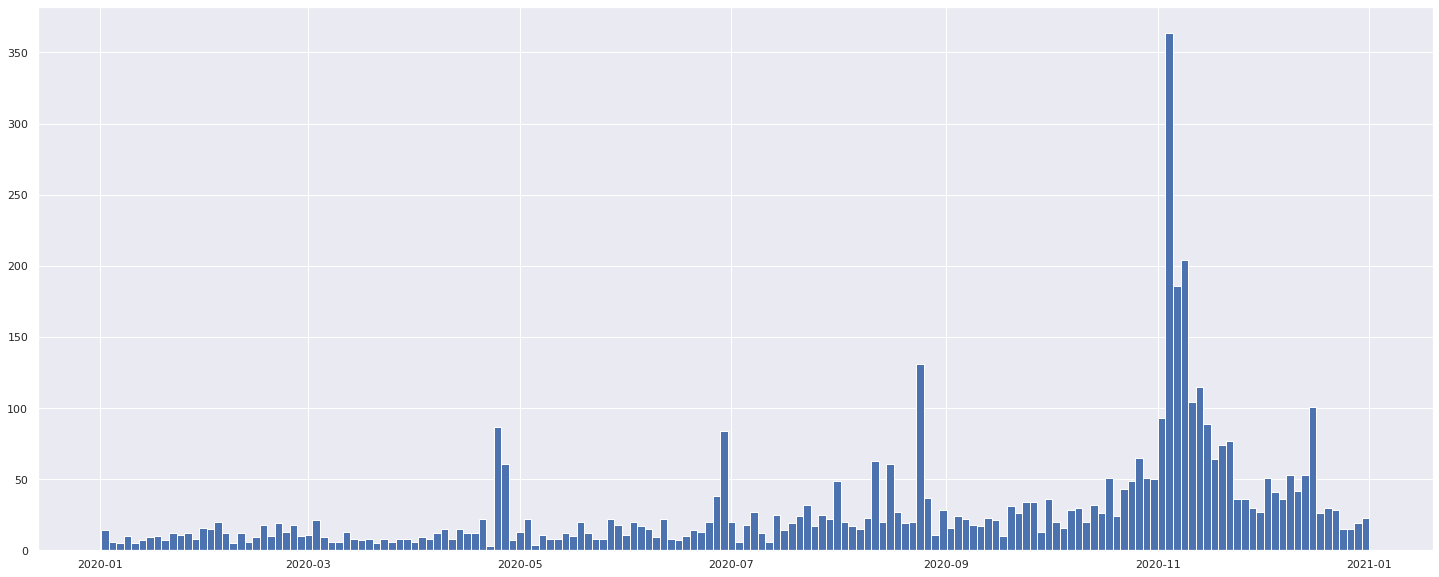

In [ ]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
#ax.set(title='Temporal tweet frequency in Bangladesh')
plt.hist(pd.to_datetime(df.Datetime), bins = 24*7, color = 'b')
plt.rc('xtick',  labelsize=18)
plt.rc('ytick',  labelsize=18)  
plt.savefig("date_wise_plot_2020-2021-6.pdf",dpi=300)    
plt.show()

###Word_wise-Bar plot

In [ ]:
text_en = df['Text']

In [ ]:
text_en_lr = text_en.apply(lambda x: re.sub(r"https\S+", "", str(x)))
text_en_lr.head()

0      i pussy not mysogynist not cringe red pill guy 
1    new india announces support palestinian commit...
2                liberal feminism cute little gift men
3    instagram hiding stories palestine the views u...
4    to think happening palestine fine believe trul...
Name: Text, dtype: object

In [ ]:
text_en_lr_lc = text_en_lr.apply(lambda x: x.lower())
text_en_lr_lc.head()
#lowercase conversion

0      i pussy not mysogynist not cringe red pill guy 
1    new india announces support palestinian commit...
2                liberal feminism cute little gift men
3    instagram hiding stories palestine the views u...
4    to think happening palestine fine believe trul...
Name: Text, dtype: object

In [ ]:
text_en_lr_lc_pr = text_en_lr_lc.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
text_en_lr_lc_pr.head()
#remove punctuation

0      i pussy not mysogynist not cringe red pill guy 
1    new india announces support palestinian commit...
2                liberal feminism cute little gift men
3    instagram hiding stories palestine the views u...
4    to think happening palestine fine believe trul...
Name: Text, dtype: object

In [ ]:
import nltk
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))
stop_words.update(['children','stand','yes','palestinians','muslim','innocent','biden','gaza','stop','land','trump','https','co','hamas','feminism','israel','palestine','believe','record','voted','voting','world','guy','trying','god','care','look','party','great','americans','american','money','office','man','want','way','got','support','says','get','better','potus','putin','gop','times','time','like','news','country','men','covid','people','state','big','house','supporters','years','thing','things','said','real','wants','administration','looking','forward','lost','president','looking','help','america','gotten','going','think','forward','putus','helped','right','good','called','election','obama','new','need','jesus','follow','argument','looking','vote','win','think','know','bengal','day','hai','se','de','go','ka','must','ko','hi','taking','donald','us','let','modi','take','india','pmoindia','2','19','one','due','get','assam','narendramodi','sir','via','dont','also','namo','and','the','to','off','as','in','for','at','I','a','.','-','_','#indiafightscorona' 'india' ,'#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus','covid19india', 'covid19'])

text_en_lr_lc_pr_sr = text_en_lr_lc_pr.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
text_en_lr_lc_pr_sr.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                     pussy mysogynist cringe red pill
1    announces palestinian commitment two solution ...
2                             liberal cute little gift
3    instagram hiding stories views unusual lesser ...
4    happening fine truly defenceless source violen...
Name: Text, dtype: object

In [ ]:
word_list = [word for line in text_en_lr_lc_pr_sr for word in line.split()]
word_list[:5]

['pussy', 'mysogynist', 'cringe', 'red', 'pill']

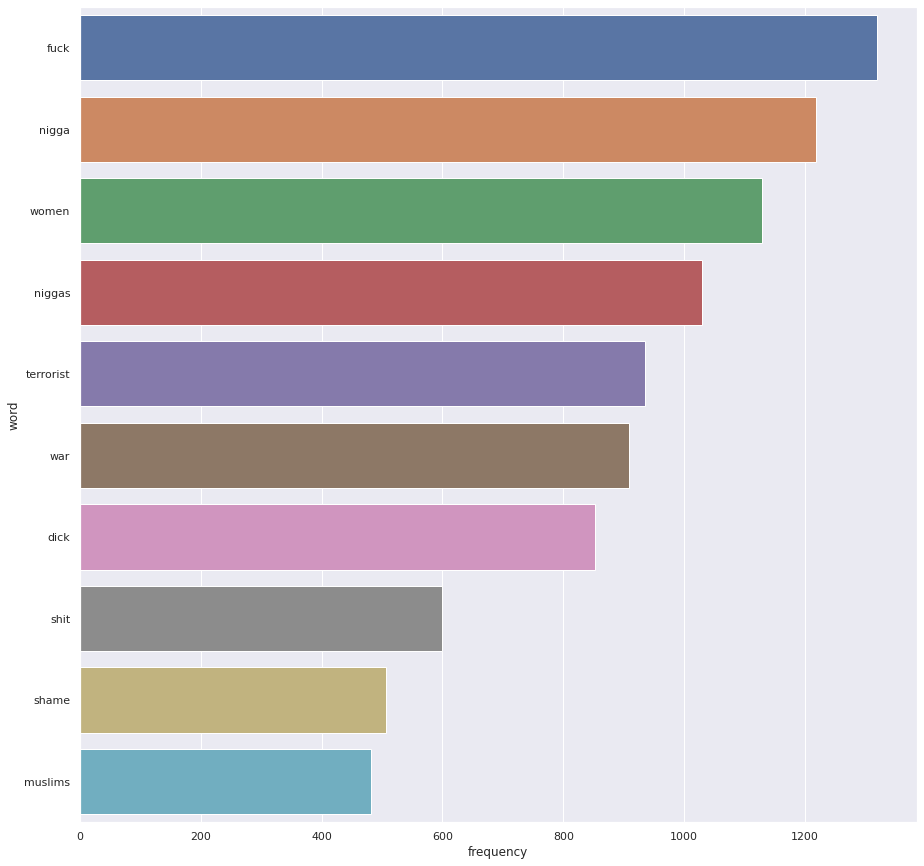

In [ ]:
sns.set(style="darkgrid")
counts = Counter(word_list).most_common(10)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize = (15, 15))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df, capsize=30)
plt.savefig('wordcount_bar.pdf',dpi=300)

##Class-wise bar plot


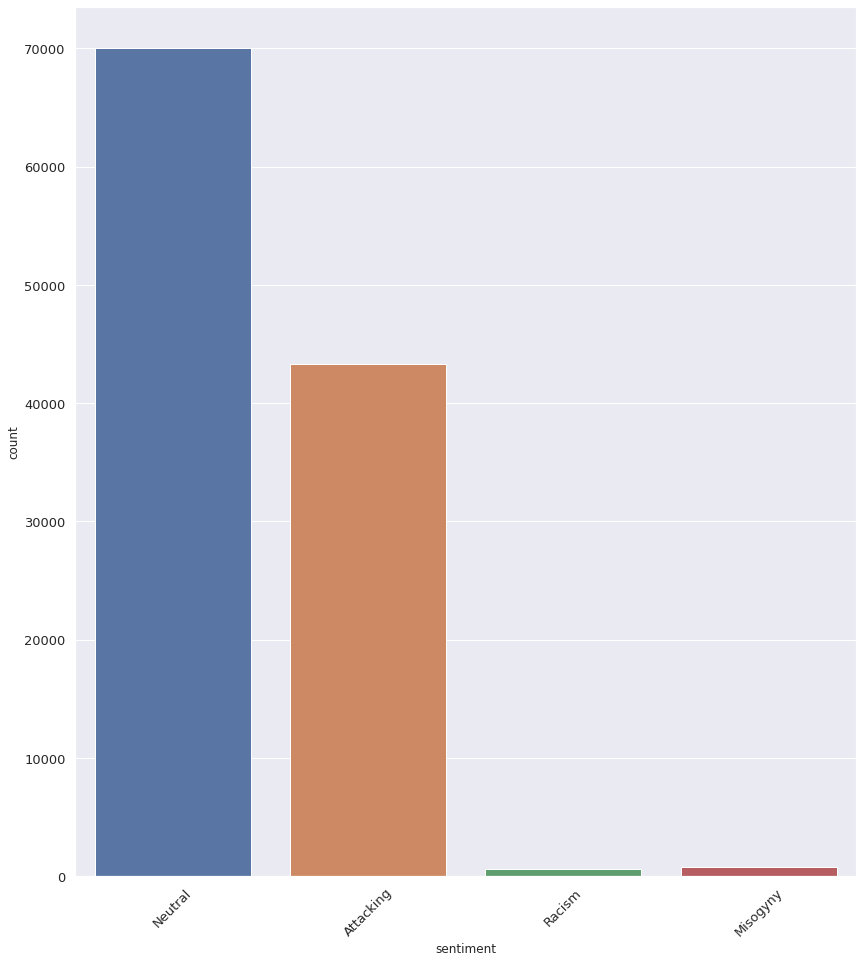

In [ ]:
plt.figure(figsize=(14,16))
sent_counts = pd.DataFrame.from_dict(Counter(df['label']), orient = 'index').reset_index()
sent_counts.columns = ['sentiment', 'count']
plt.xticks(rotation=45,fontsize=13)
plt.yticks(fontsize=13)
sns.barplot(y="count", x='sentiment', data=sent_counts, capsize=19)
plt.savefig('class.pdf',dpi=300)

##Concern-wise stacked bar

In [ ]:
df.Text=df.Text.astype(str)

In [ ]:
#mask= (df['label']=="Attacking") & (df['label']=="Mysogyny") & (df['label']=="Racism")
#df=df.loc[mask]

In [ ]:
df["Israel-Palestine"]=0
df["Soleimani_Attack"]=0
df["#India_needs_oxygen"]=0
df["Durgapuja2021"]=0
df["LGBTQ Pride_day"]=0
df["usa_election2020"]=0
df["BLM"]=0
df["Feminism"]=0

In [ ]:
df["Israel-Palestine"]=df['Text'].str.contains('israel', case=False).astype(int)
df["Soleimani_Attack"]=df['Text'].str.contains('soleimani', case=False).astype(int)
df["#India_needs_oxygen"]=df['Text'].str.contains('india', case=False).astype(int)
df["Durgapuja2021"]=df['Text'].str.contains('puja', case=False).astype(int)
df["LGBTQ Pride_day"]=df['Text'].str.contains('lgbtq', case=False).astype(int)
df["usa_election2020"]=df['Text'].str.contains('trump', case=False).astype(int)
df["BLM"]=df['Text'].str.contains('blm', case=False).astype(int)
df["Feminism"]=df['Text'].str.contains('feminism', case=False).astype(int)

In [ ]:
#del df['category']
df["category"]="None"

In [ ]:
#df.loc[df['text'].str.contains('corona', case=False),'category'] = "corona"
#df.loc[df['text'].str.contains('coronavirus', case=False),'category'] = "coronavirus"
#df.loc[df['text'].str.contains('covid', case=False),'category'] = "COVID-19"

df.loc[df['Text'].str.contains('israel', case=False),'category'] = "Israel-Palestine"
df.loc[df['Text'].str.contains('palestine', case=False),'category'] = "Israel-Palestine"
df.loc[df['Text'].str.contains('gaza', case=False),'category'] = "Israel-Palestine"

df.loc[df['Text'].str.contains('soleimani', case=False),'category'] = "Soleimani_Attack"
df.loc[df['Text'].str.contains('iran', case=False),'category'] = "Soleimani_Attack"

#df.loc[df['text'].str.contains('wash hands', case=False),'category'] = "wash hands"
#df.loc[df['text'].str.contains('washhands', case=False),'category'] = "wash hands"
#df.loc[df['text'].str.contains('washhand', case=False),'category'] = "wash hands"
#df.loc[df['text'].str.contains('washhand', case=False),'category'] = "wash hands"
#df.loc[df['text'].str.contains('clean', case=False),'category'] = "wash hands"

#df["#India_needs_oxygen"]=df['Text'].str.contains('india', case=False).astype(int)

df.loc[df['Text'].str.contains('india', case=False),'category'] = "#India_needs_oxygen"
df.loc[df['Text'].str.contains('oxygen', case=False),'category'] = "#India_needs_oxygen"

#df["Durgapuja2021"]=df['Text'].str.contains('puja', case=False).astype(int)

df.loc[df['Text'].str.contains('durgapuja', case=False),'category'] = "Durgapuja2021"
df.loc[df['Text'].str.contains('puja', case=False),'category'] = "Durgapuja2021"

#df["LGBTQ Pride_day"]=df['Text'].str.contains('lgbtq', case=False).astype(int)

#df.loc[df['Text'].str.contains('lgbtq', case=False),'category'] = "LGBTQ-Pride_day"
#df.loc[df['Text'].str.contains('gay', case=False),'category'] = "LGBTQ-Pride_day"

#df.loc[df['text'].str.contains('sanitize', case=False),'category'] = "sanitize"
#df.loc[df['text'].str.contains('sanitizer', case=False),'category'] = "sanitize"

#df["usa_election2020"]=df['Text'].str.contains('trump', case=False).astype(int)

df.loc[df['Text'].str.contains('trump', case=False),'category'] = "usa_election2020"
df.loc[df['Text'].str.contains('biden', case=False),'category'] = "usa_election2020"
df.loc[df['Text'].str.contains('election', case=False),'category'] = "usa_election2020"

#df["BLM"]=df['Text'].str.contains('blm', case=False).astype(int)

df.loc[df['Text'].str.contains('black', case=False),'category'] = "BLM"
df.loc[df['Text'].str.contains('nigga', case=False),'category'] = "BLM"
df.loc[df['Text'].str.contains('blm', case=False),'category'] = "BLM"

#df.loc[df['text'].str.contains('government', case=False),'category'] = "government"
#df.loc[df['text'].str.contains('govt', case=False),'category'] = "government"

#df["Feminism"]=df['Text'].str.contains('feminism', case=False).astype(int)

df.loc[df['Text'].str.contains('women', case=False),'category'] = "Feminism"
df.loc[df['Text'].str.contains('woman', case=False),'category'] = "Feminism"
df.loc[df['Text'].str.contains('feminism', case=False),'category'] = "Feminism"



<Figure size 1728x1872 with 0 Axes>

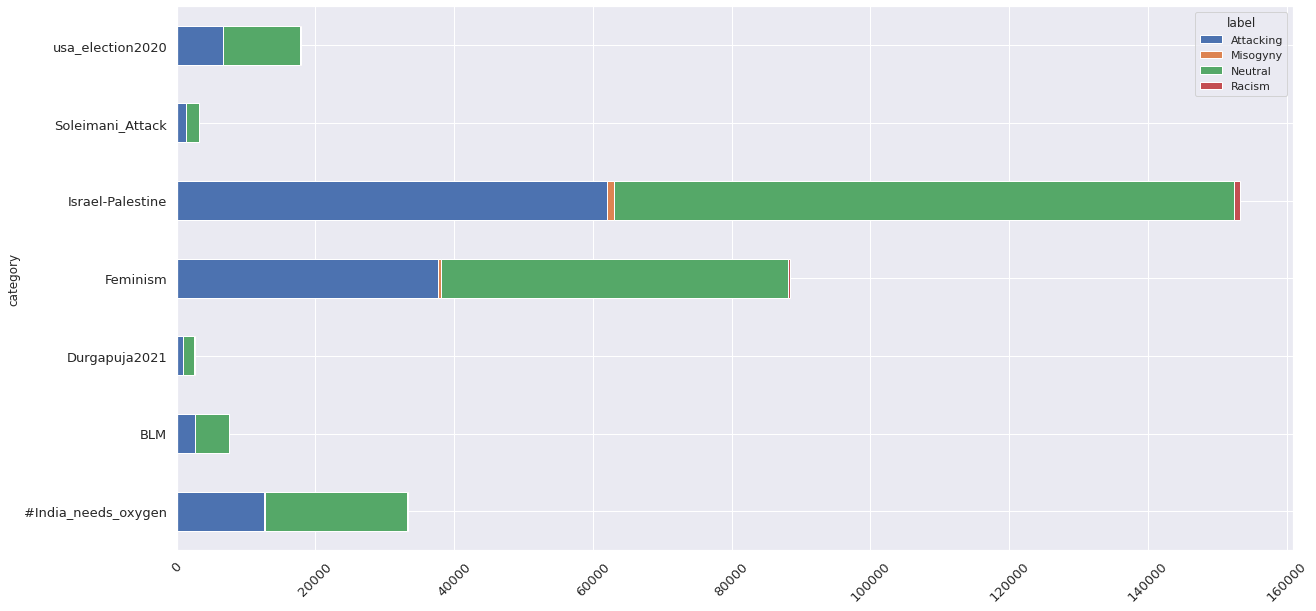

In [ ]:
plt.figure(figsize=(24,26))
pd.crosstab(index = df["category"],columns = df["label"]).drop(['None']).plot(kind='barh',figsize=(20, 10),alpha=1,rot=0, fontsize=18,stacked=True)
plt.xticks(rotation=45,fontsize=13)
plt.yticks(fontsize=13)
plt.savefig("category.pdf",dpi=300)

##Month-wise

In [ ]:
#pd.crosstab(index = df["date"],columns = df["sentiment"]).plot(kind='bar',figsize=(15, 10),alpha=0.5,rot=0,stacked=True,title="COVID-19 Sentiment")

In [ ]:
df.date = pd.to_datetime(df.Datetime)
df.date=df.date.astype(str)

In [ ]:
df["month"]=0
# df.loc[df['date'].str.contains('2020-05-',regex=True, case=False),'month'] = "M-5(May)"
# df.loc[df['date'].str.contains('2020-04-',regex=True, case=False),'month'] = "M-4(April)"
# df.loc[df['date'].str.contains('2020-03-',regex=True, case=False),'month'] = "M-3(March)"
# df.loc[df['date'].str.contains('2020-02-',regex=True, case=False),'month'] = "M-2(February)"
# df.loc[df['date'].str.contains('2020-01-',regex=True, case=False),'month'] = "M-1(January)"

df.loc[df['date'].str.contains('2021-12-',regex=True, case=False),'month'] = "December"
df.loc[df['date'].str.contains('2021-11-',regex=True, case=False),'month'] = "November"
df.loc[df['date'].str.contains('2021-10-',regex=True, case=False),'month'] = "October"
df.loc[df['date'].str.contains('2021-09-',regex=True, case=False),'month'] = "September"
df.loc[df['date'].str.contains('2021-08-',regex=True, case=False),'month'] = "August"
df.loc[df['date'].str.contains('2021-07-',regex=True, case=False),'month'] = "July"
df.loc[df['date'].str.contains('2021-06-',regex=True, case=False),'month'] = "June"
df.loc[df['date'].str.contains('2021-05-',regex=True, case=False),'month'] = "May"
df.loc[df['date'].str.contains('2021-04-',regex=True, case=False),'month'] = "April"
df.loc[df['date'].str.contains('2021-03-',regex=True, case=False),'month'] = "March"
df.loc[df['date'].str.contains('2021-02-',regex=True, case=False),'month'] = "February"
df.loc[df['date'].str.contains('2021-01-',regex=True, case=False),'month'] = "January"


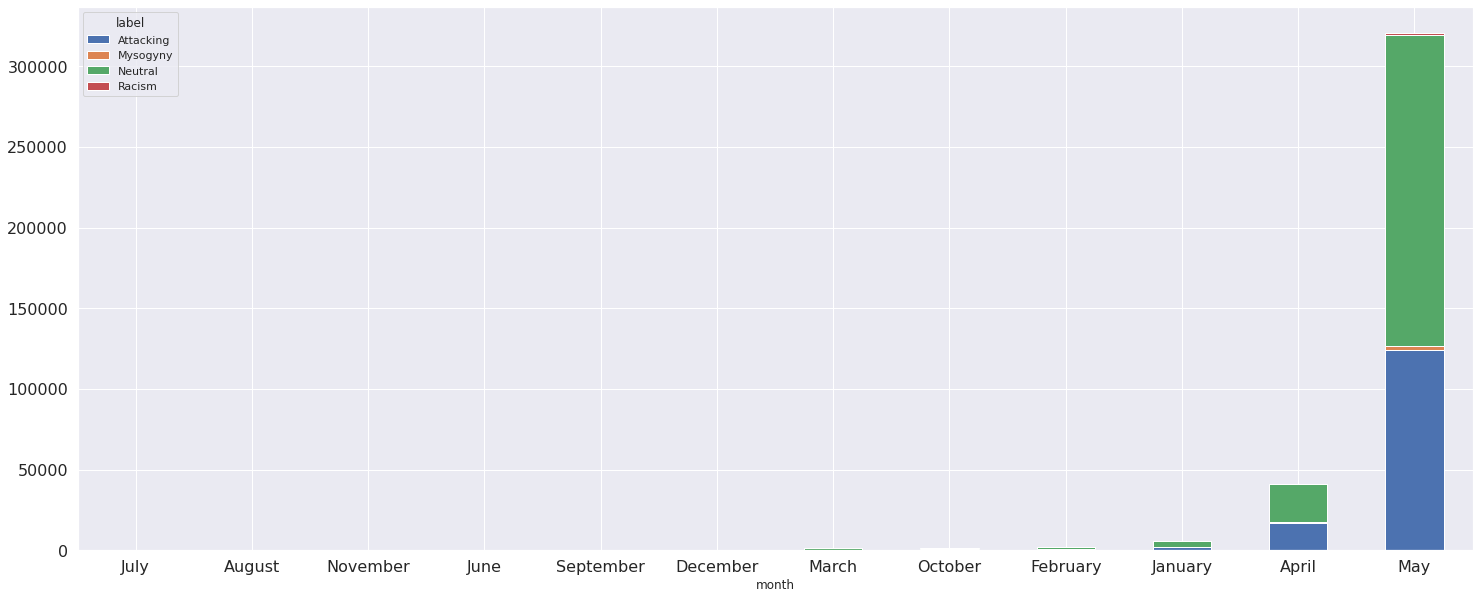

In [ ]:
df.sort_values(by=['date'])
bar2=pd.crosstab(index = df["month"],columns = df["label"])
bar2.sort_values(by=[''], inplace=True)
bar2.plot(kind='bar',figsize=(25, 10),fontsize=16,alpha=1,rot=0,stacked=True)

In [ ]:
plt.savefig("month_comparison.png")

In [ ]:
df["Date"]=pd.to_datetime(df.Datetime)

In [ ]:
start_date = '01-01-2021'
end_date = '31-12-2021'
mask= (df['Date']>=start_date)&(df['Date']<= end_date)
df=df.loc[mask]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373486 entries, 12 to 420001
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   Unnamed: 0  373486 non-null  int64              
 1   index       373486 non-null  int64              
 2   Datetime    373486 non-null  object             
 3   Text        373277 non-null  object             
 4   lang        373486 non-null  object             
 5   class       373486 non-null  int64              
 6   label       373486 non-null  object             
 7   tweet       373277 non-null  object             
 8   Date        373486 non-null  datetime64[ns, UTC]
 9   date        373486 non-null  object             
 10  month       373486 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 34.2+ MB


In [ ]:
df['date'] = pd.to_datetime(df['Datetime']).dt.date

In [ ]:
df['date']

12        2021-12-30
13        2021-12-30
14        2021-12-30
15        2021-12-30
16        2021-12-30
             ...    
419997    2021-05-13
419998    2021-05-13
419999    2021-05-13
420000    2021-05-13
420001    2021-05-13
Name: date, Length: 373486, dtype: object

In [ ]:
ct=pd.crosstab(index = df["date"],columns = df["label"])
ct

label,Attacking,Mysogyny,Neutral,Racism
date,,,,
2021-01-01,175,3,281,3
2021-01-02,134,4,244,2
2021-01-03,174,3,326,4
2021-01-04,74,0,161,1
2021-01-05,63,2,146,2
...,...,...,...,...
2021-12-26,13,0,39,1
2021-12-27,7,0,25,0
2021-12-28,5,0,18,0


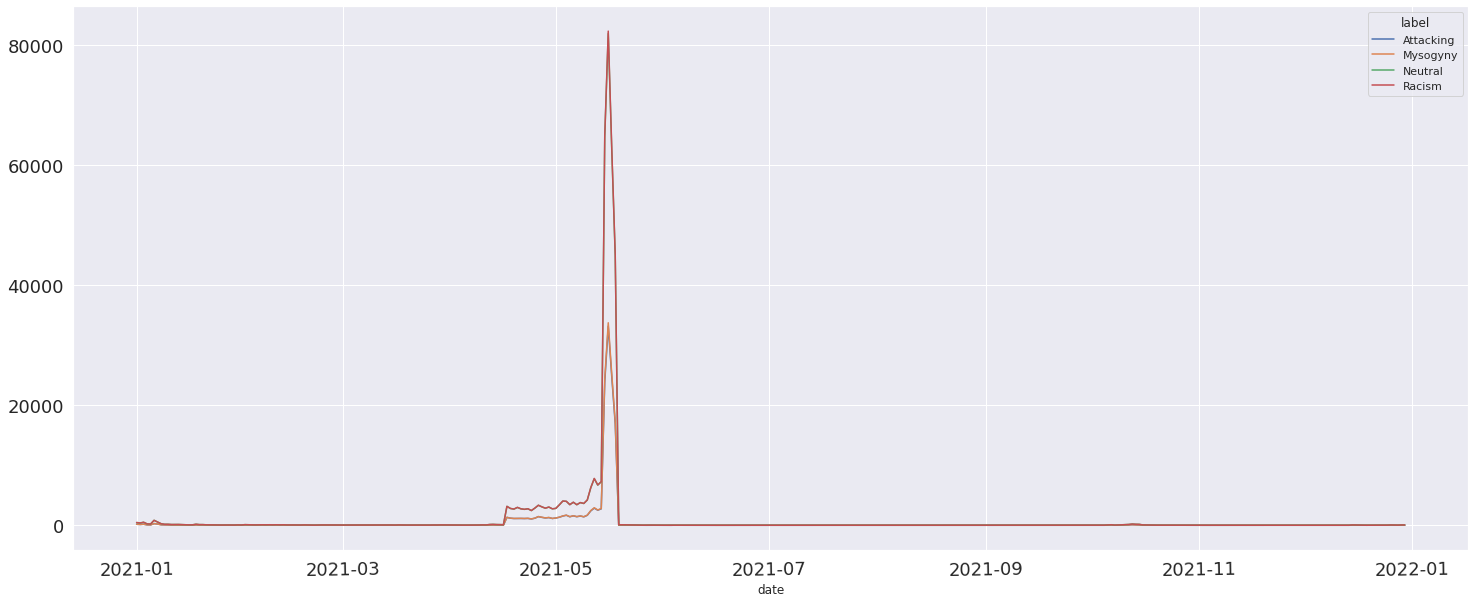

In [ ]:
ct.plot(kind='line',figsize=(25, 10),alpha=1,rot=1,stacked=True)

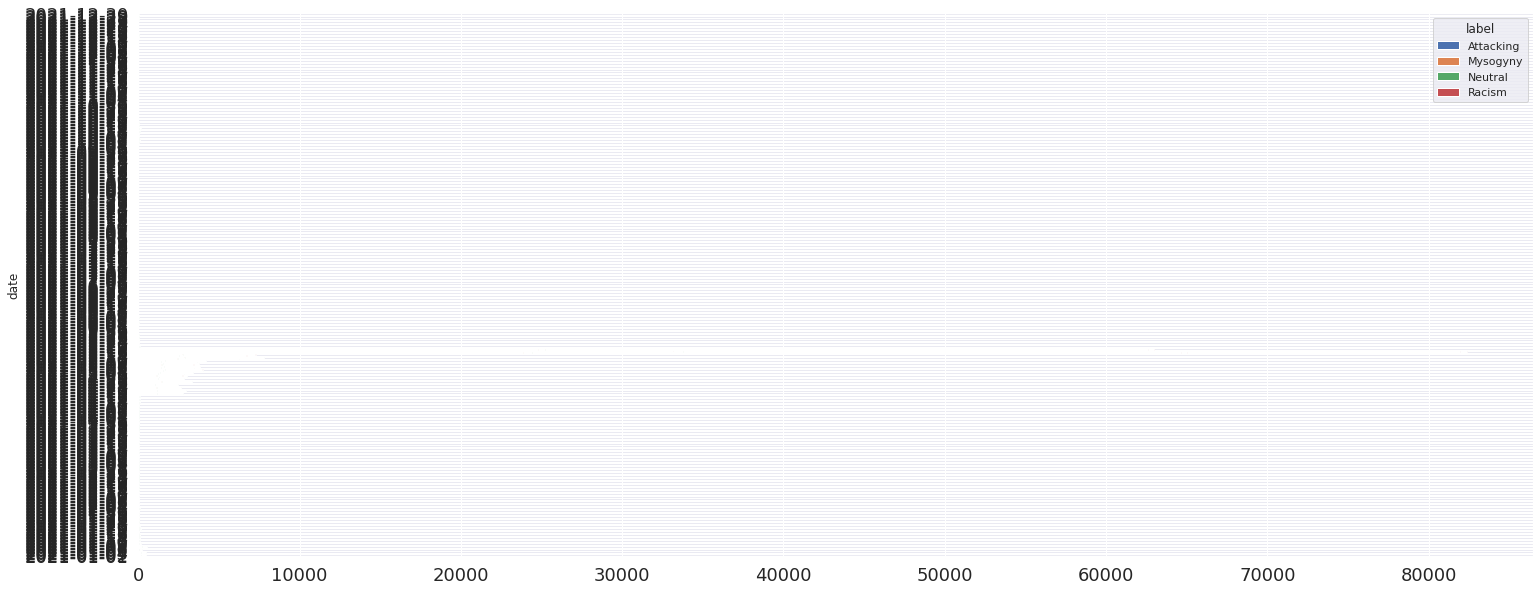

In [ ]:
ct.plot(kind='barh',figsize=(55, 10),alpha=1, stacked=True)


In [ ]:
plt.savefig("daywise_comparison.png")

##word cloud

##Embedding using NN


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 500

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['tidy_tweet'])
sequences = tokenizer.texts_to_sequences(train_df['tidy_tweet'])
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

AttributeError: ignored

In [ ]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 84)


In [ ]:
from tensorflow.keras import utils as np_utils
y2 =np_utils.to_categorical(train_df['shutonu'], 6)


ValueError: ignored

In [ ]:
tweets,y=oversample.fit_resample(tweets,y1)


NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
xtrain_nn, xtest_nn, ytrain, ytest = train_test_split(tweets, y2, random_state=42, test_size=0.3)

In [ ]:
!pip install keras.utils


  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=29b502c97f2317a37564aae70e7279e45f1dfa953260c9a611d6b664cd8b8e83
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [ ]:
from tensorflow.keras import utils as np_utils
ytrain =np_utils.to_categorical(ytrain, 7)
ytest =  np_utils.to_categorical(ytest, 7)

In [ ]:
ytrain.shape


(542, 6)

In [ ]:
xtrain_nn,ytrain=oversample.fit_resample(xtrain_nn,ytrain)
xtest_nn,ytest=oversample.fit_resample(xtest_nn,ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
y_train = np.asarray(train_labels).astype('float32').reshape((-1,1))
y_test = np.asarray(test_labels).astype('float32').reshape((-1,1))

In [ ]:
import tensorflow as tf


In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/323 final/final.csv')

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20)) #The embedding layer
model1.add(layers.LSTM(64,dropout=0.5)) 
#model1.add(layers.LSTM(16,dropout=0.3))#Our LSTM layer
model1.add(layers.Dense(6,activation='tanh'))


model1.compile(optimizer=tf.keras.optimizers.Adam(1e-4),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(xtrain_nn, ytrain, epochs=70,validation_data=(xtest_nn, ytest),callbacks=[checkpoint1])


NameError: ignored

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(max_words, 20)
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  dropout=.5)),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit((xtrain_nn, ytrain, epochs=40,
                    validation_data=(xtest_nn, ytest),
                    validation_steps=30)

test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

SyntaxError: ignored

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

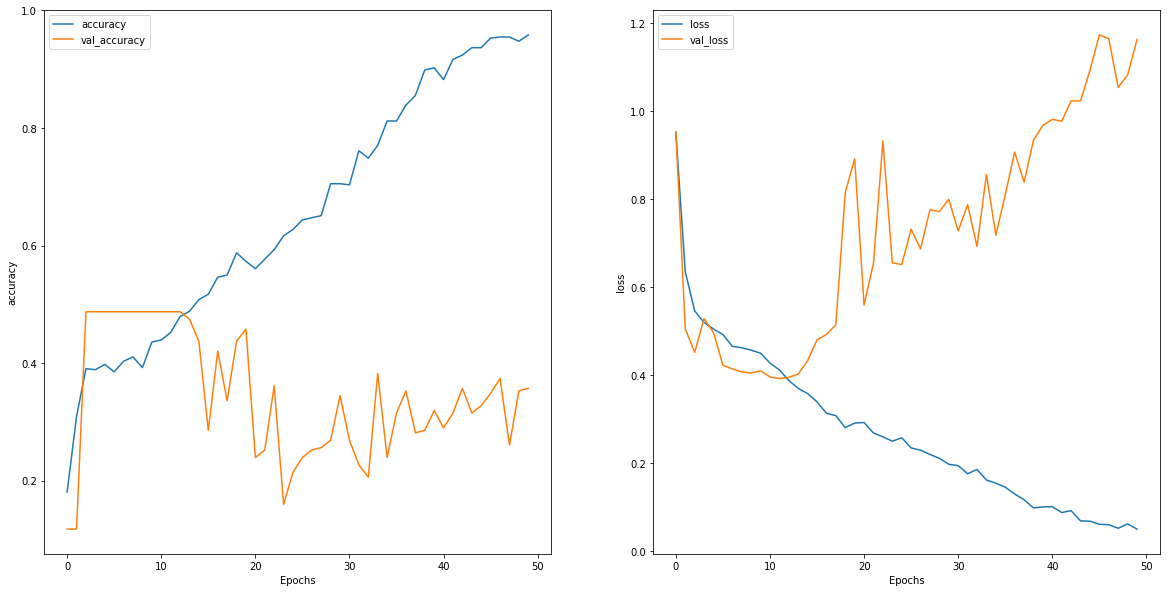

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plot_graphs(history1, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history1, 'loss')
plt.savefig('RNN1.png',dpi=300)

In [ ]:
# System
import os

# Time
import time
import datetime

# Numerical
import numpy as np
import pandas as pd

# Tools
import itertools
from collections import Counter

# NLP
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# from pywsd.utils import lemmatize_sentence

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

# Deep Learing Preprocessing - Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras import utils as np_utils

# Deep Learning Model - Keras
from keras.models import Model
from keras.models import Sequential




# Deep Learning Model - Keras - RNN
from keras.layers import Embedding, LSTM, Bidirectional

# Deep Learning Model - Keras - General
from keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import LeakyReLU, PReLU, Lambda, Multiply



# Deep Learning Parameters - Keras
#from keras.optimizers import RMSprop, Adam

# Deep Learning Callbacs - Keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#print(os.listdir("../input"))

In [ ]:
X = train_df.tidy_tweet
Y = train_df.shutonu

label_encoder = LabelEncoder()

Y = label_encoder.fit_transform(Y)

Y = np_utils.to_categorical(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

max_words = len(set(" ".join(X_train).split()))
max_len = X_train.apply(lambda x: len(x)).max()

# max_words = 1000
# max_len = 150
max_words, max_len

(2750, 192)

In [ ]:
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_seq = sequence.pad_sequences(X_train_seq, maxlen=max_len)

In [ ]:
# Calculate Class Weights
def get_weight(y):
    class_weight_current =  cw.compute_class_weight('balanced', np.unique(y), y)
    return class_weight_current

In [ ]:
class_weight = get_weight(Y_train.flatten())

In [ ]:
class_weight

array([0.6, 3. ])

In [ ]:
def get_rnn_model(num_class=2):
    model = Sequential()
    
    model.add(Embedding(max_words, 100, input_length=max_len))
    model.add(LSTM(256))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(512, activation='relu'))
    
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    if num_class>2:
        model.add(Dense(num_class, activation='softmax'))
    else:
        model.add(Dense(1, activation='sigmoid'))
    
    model.summary()
    
    return model

In [ ]:
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()


In [ ]:
num_class = 6
model2= get_rnn_model(num_class=num_class)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 192, 100)          275000    
_________________________________________________________________
lstm (LSTM)                  (None, 256)               365568    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0

In [ ]:
#loss = 'categorical_crossentropy'
loss = 'binary_crossentropy'
metrics = ['accuracy']


In [ ]:
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today() 

In [ ]:
import tensorflow as tf
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto',save_weights_only=False)
#history = model1.fit(xtrain_nn, ytrain, epochs=70,validation_data=(xtest_nn, ytest),callbacks=[checkpoint1])



In [ ]:
print("Starting...\n")

start_time = time.time()
print(date_time(1))

print("\n\nCompliling Model ...\n")
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate)
# optimizer = Adam()

model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

verbose = 1
epochs = 100
batch_size = 128
validation_split = 0.4

print("Trainning Model ...\n")

history3 = model2.fit(
    X_train_seq,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    callbacks=checkpoint1,
    validation_split=validation_split
    #class_weight=class_weight
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning", date_time(1))

Starting...

Timestamp: 2021-08-20 09:26:54


Compliling Model ...

Trainning Model ...

Epoch 1/100
4/4 [==============================] - 9s 193ms/step - loss: 0.9496 - accuracy: 0.1843 - val_loss: 0.5824 - val_accuracy: 0.3070

Epoch 00001: val_accuracy improved from -inf to 0.30696, saving model to best_model1.hdf5
Epoch 2/100
4/4 [==============================] - 0s 48ms/step - loss: 0.8277 - accuracy: 0.2436 - val_loss: 0.5607 - val_accuracy: 0.1361

Epoch 00002: val_accuracy did not improve from 0.30696
Epoch 3/100
4/4 [==============================] - 0s 39ms/step - loss: 0.6582 - accuracy: 0.3199 - val_loss: 0.4574 - val_accuracy: 0.1392

Epoch 00003: val_accuracy did not improve from 0.30696
Epoch 4/100
4/4 [==============================] - 0s 40ms/step - loss: 0.5656 - accuracy: 0.3496 - val_loss: 0.3998 - val_accuracy: 0.4747

Epoch 00004: val_accuracy improved from 0.30696 to 0.47468, saving model to best_model1.hdf5
Epoch 5/100
4/4 [==============================] - 0s

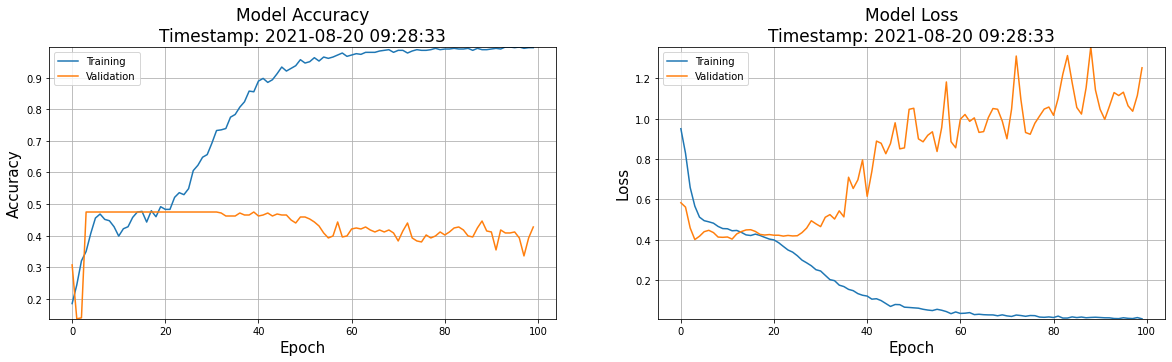

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_performance(history=history3)
plt.savefig('RNN2.png',dpi=300)

In [ ]:
ypreds1 = model2.predict_classes(test_X_seq, verbose=1)


AttributeError: ignored

In [ ]:
plot_confusion_matrix(Y_test, ypreds1, title="RNN")

In [ ]:
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

In [ ]:
Lstm=model1.predict(xtest_nn)

In [ ]:
print(classification_report(ytest, Lstm, target_names=class_names))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import classification_report


In [ ]:
n_classes=6
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest[:, i],Lstm[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ytest.ravel(), Lstm.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


y=[0,1,2,3,4,5]
labels=le.inverse_transform(y)
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle='-', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle='-', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue','yellow','orange','red']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], linestyle='-',color=color[i], label=' class '+str(labels[i])+' with area '+str(format(roc_auc[i],'.2f')))

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 14.9 MB/s 
     |████████████████████████████████| 895 kB 65.8 MB/s 
     |████████████████████████████████| 3.3 MB 75.1 MB/s 
     |████████████████████████████████| 636 kB 76.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


BERT Hugging face implementation



In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer
	
	# Use pre-trained models for BERT
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=7)
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

ModuleNotFoundError: ignored

In [ ]:
!pip install -q -U tensorflow-text


     |████████████████████████████████| 4.3 MB 5.0 MB/s 


In [ ]:
# Define the training parameters
num_samples = [100, 150, 200, 300, 350]
epochs=3
patience=3
batch_size=64
seq_len = 30
lr=2e-5
clip=1.0
#log_level=logging.DEBUG

# Run!
result_bert, model_trained_bert = train_cycles(train_df['tidy_tweet'], train_df['target'], vocab, num_samples, 'BERT', epochs, patience, batch_size, seq_len, lr, clip, logging.DEBUG)

# Save the model and show the result
torch.save(model_trained_lstm.state_dict(), output_dir + 'stocktwit_bert.dict')
result_bert

In [ ]:
!pip install watermark

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.6.4
    Uninstalling importlib-metadata-4.6.4:
      Successfully uninstalled importlib-metadata-4.6.4


In [ ]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 13.0 MB/s 
     |████████████████████████████████| 895 kB 32.6 MB/s 
     |████████████████████████████████| 3.3 MB 52.0 MB/s 
     |████████████████████████████████| 636 kB 40.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
%reload_ext watermark

%watermark -v -p numpy,pandas,torch,transformers



import transformers

from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

import torch

import numpy as np

import pandas as pd

import seaborn as sns

from pylab import rcParams

import matplotlib.pyplot as plt

from matplotlib import rc

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from collections import defaultdict

from textwrap import wrap

from torch import nn, optim

from torch.utils.data import Dataset, DataLoader

%matplotlib inline

%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Python implementation: CPython
Python version       : 3.7.11
IPython version      : 5.5.0

numpy       : 1.19.5
pandas      : 1.1.5
torch       : 1.9.0+cu102
transformers: 4.9.2



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/323 final/1K_byme.csv")
df=df.head(n=1000)
df=df[['Datetime','Text','shutonu']]
df.head()

,Datetime,Text,shutonu
0,2016-08-24 01:37:58+00:00,Check out Unilever Fair &amp; and Lovely Advan...,neutral
1,2021-04-18 03:48:54+00:00,"@SatuRuna If you continue through OP's thread,...",neutral
2,2020-09-27 02:16:46+00:00,Never forget this: kneeling was the peaceful p...,positive
3,2021-05-17 21:43:37+00:00,"Israel-Gaza conflict rages on despite U.S., re...",neutral
4,2021-03-16 03:23:47+00:00,@Smolbee4 @TheHellCurve @ResplendentElk @TheLa...,offensive


In [ ]:
df=df.dropna()
df=df.drop_duplicates()

In [ ]:
df.count()

Datetime    775
Text        775
shutonu     775
dtype: int64

In [ ]:
!pip install tweet-preprocessor
!pip install contractions

In [ ]:
import contractions as c
import preprocessor as p

In [ ]:
def contraction_expand_tweet(row):
    text = row['Text']
    text = c.fix(text)
    return text

In [ ]:
df['Text'] = df.apply(contraction_expand_tweet, axis=1)

In [ ]:
def preprocess_tweet(row):
    text = row['Text']
    text = p.clean(text)
    return text

In [ ]:
df['Text'] = df.apply(preprocess_tweet, axis=1)

In [ ]:
df['shutonu']=df.shutonu.replace('neutral;','neutral')

In [ ]:
df=train_df

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


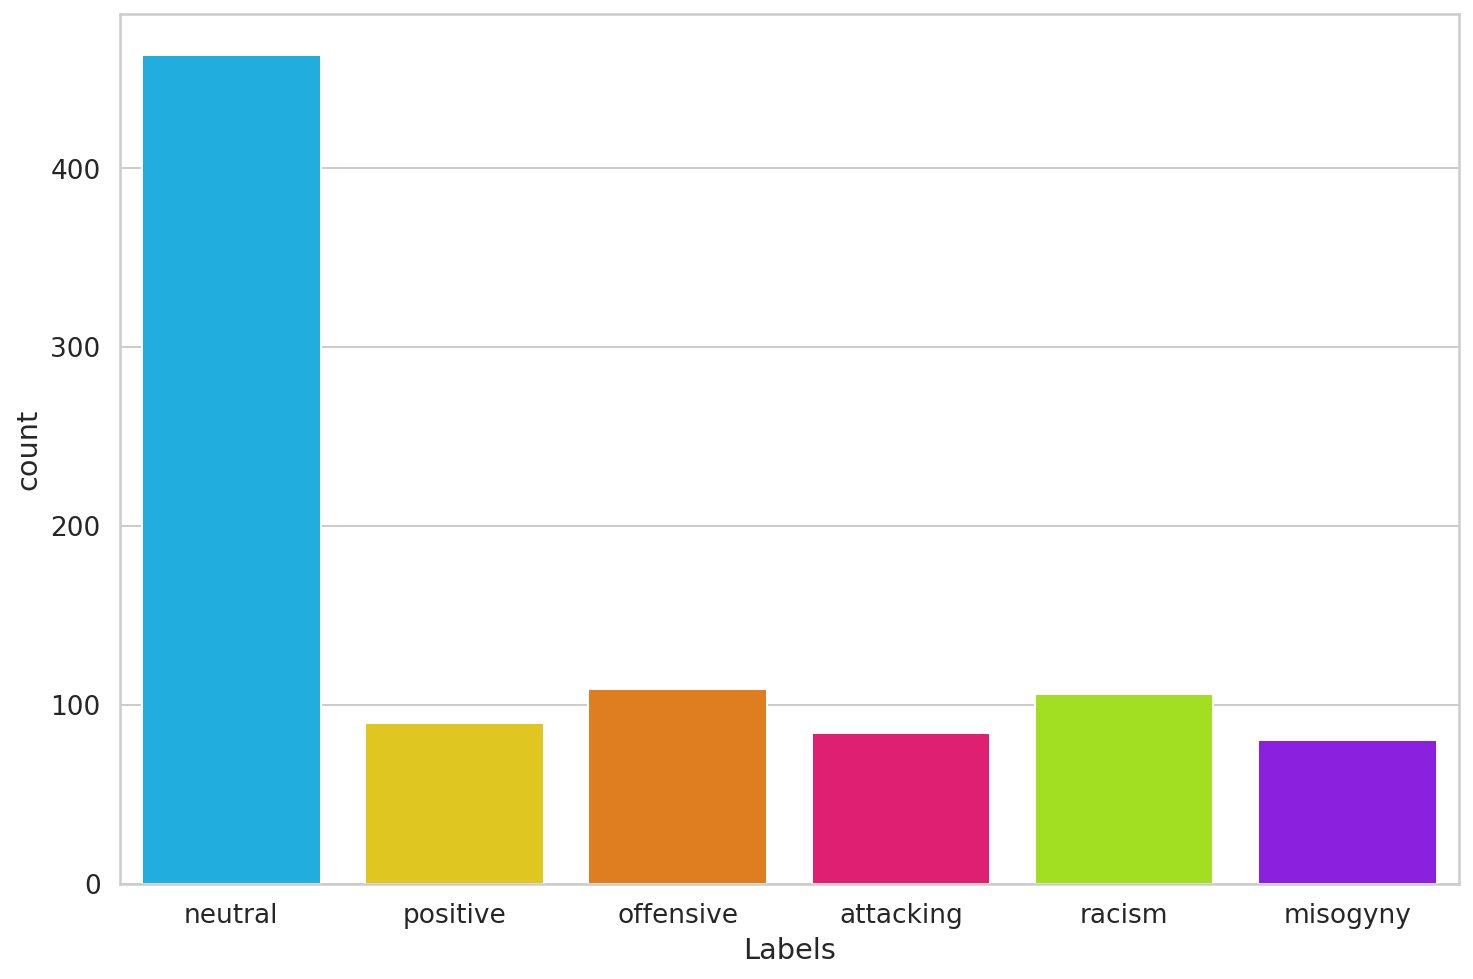

In [ ]:
sns.countplot(df.shutonu)

plt.xlabel('Labels');

In [ ]:
df=train_df

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df.shutonu)
df['Target'] = le.transform(df.shutonu)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

In [ ]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
tokenizer.sep_token, tokenizer.sep_token_id


('[SEP]', 102)

In [ ]:
tokenizer.cls_token, tokenizer.cls_token_id


('[CLS]', 101)

In [ ]:
tokenizer.pad_token, tokenizer.pad_token_id


('[PAD]', 0)

In [ ]:
tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 100)

In [ ]:
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'

In [ ]:
from collections import defaultdict
encoding = tokenizer.encode_plus(

  sample_txt,

  max_length=None,

  add_special_tokens=True, # Add '[CLS]' and '[SEP]'

  return_token_type_ids=False,

  pad_to_max_length=True,

  return_attention_mask=True,

  return_tensors='pt',  # Return PyTorch tensors

)

encoding.keys()



NameError: ignored

In [ ]:
token_lens = []

for txt in train_df.Text:

  tokens = tokenizer.encode(txt, max_length=512,truncation=True)

  token_lens.append(len(tokens))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


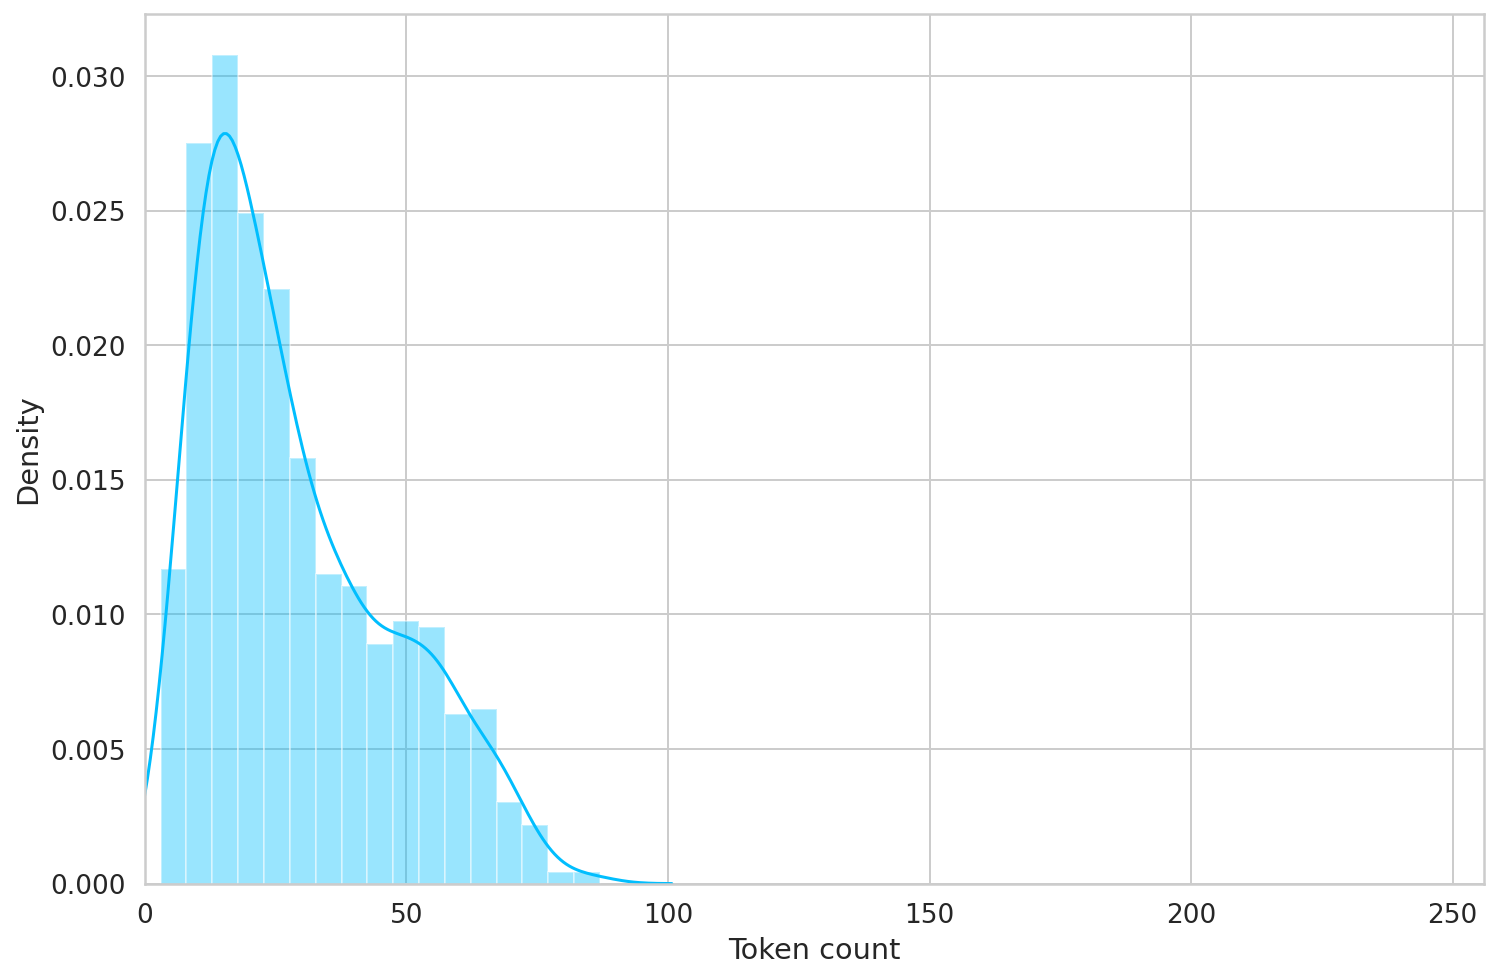

In [ ]:
sns.distplot(token_lens)

plt.xlim([0, 256]);

plt.xlabel('Token count');
plt.savefig('Bert_tokens.png',dpi=300)

In [ ]:
MAX_LEN = 80

In [ ]:
class GPReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):

    self.reviews = reviews

    self.targets = targets

    self.tokenizer = tokenizer

    self.max_len = max_len

  def __len__(self):

    return len(self.reviews)

  def __getitem__(self, item):

    review = str(self.reviews[item])

    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(

      review,

      add_special_tokens=True,

      max_length=self.max_len,

      return_token_type_ids=False,

      pad_to_max_length=True,

      return_attention_mask=True,

      return_tensors='pt',

    )

    return {

      'review_text': review,

      'input_ids': encoding['input_ids'].flatten(),

      'attention_mask': encoding['attention_mask'].flatten(),

      'targets': torch.tensor(target, dtype=torch.long)

    }

In [ ]:
df_train, df_test = train_test_split(

  df,

  test_size=0.3,

  random_state=RANDOM_SEED

)

df_val, df_test = train_test_split(

  df_test,

  test_size=0.5,

  random_state=RANDOM_SEED

)

df_train.shape, df_val.shape, df_test.shape

((653, 6), (140, 6), (141, 6))

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):

  ds = GPReviewDataset(

    reviews=df.Text.to_numpy(),

    targets=df.Target.to_numpy(),

    tokenizer=tokenizer,

    max_len=max_len

  )

  return DataLoader(

    ds,

    batch_size=batch_size,

    num_workers=4

  )

BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)

val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)

test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
data=dict()
data = next(iter(train_data_loader))

data.keys()

#dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

print(data['input_ids'].shape)

print(data['attention_mask'].shape)

print(data['targets'].shape)

torch.Size([16, 160])

torch.Size([16, 160])

torch.Size([16])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulti

torch.Size([16, 80])
torch.Size([16, 80])
torch.Size([16])


torch.Size([16])

In [ ]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
    self.return_dict=False
    self.padding=MAX_LEN
  
  def forward(self, input_ids, attention_mask):
    returned = self.bert(
    input_ids=input_ids,
    attention_mask=attention_mask
    )
    pooled_output = returned["pooler_output"]
    output = self.drop(pooled_output)
    return self.out(output)



In [ ]:
model = SentimentClassifier(6)
model = model.to(device)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([16, 80])
torch.Size([16, 80])


In [ ]:
torch.nn.functional.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.0980, 0.1522, 0.1245, 0.2807, 0.1727, 0.1719],
        [0.1144, 0.1277, 0.2224, 0.2899, 0.1376, 0.1080],
        [0.1386, 0.0966, 0.1622, 0.3543, 0.1380, 0.1103],
        [0.0543, 0.1031, 0.1065, 0.4354, 0.1866, 0.1142],
        [0.2290, 0.0888, 0.0898, 0.3603, 0.1135, 0.1187],
        [0.0804, 0.1180, 0.1087, 0.3055, 0.2168, 0.1705],
        [0.0794, 0.1049, 0.1190, 0.4025, 0.1766, 0.1176],
        [0.1109, 0.0771, 0.1288, 0.3537, 0.1946, 0.1349],
        [0.1463, 0.0648, 0.1475, 0.4067, 0.1635, 0.0713],
        [0.1168, 0.0668, 0.1670, 0.4389, 0.1202, 0.0904],
        [0.0940, 0.0545, 0.1262, 0.5393, 0.1066, 0.0794],
        [0.1244, 0.0704, 0.1587, 0.3055, 0.2083, 0.1328],
        [0.0491, 0.0774, 0.0782, 0.5554, 0.1515, 0.0884],
        [0.0751, 0.0737, 0.1067, 0.4709, 0.1729, 0.1007],
        [0.1405, 0.0898, 0.1628, 0.3670, 0.1224, 0.1174],
        [0.0548, 0.1198, 0.2057, 0.3413, 0.1452, 0.1332]], device='cuda:0',
       grad_fn=<SoftmaxBackward>)

In [ ]:
EPOCHS = 10

optimizer = AdamW(model.parameters(), lr=3e-5, correct_bias=True)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
train_data_loader.type


In [ ]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):

  model = model.eval()

  losses = []

  correct_predictions = 0

  with torch.no_grad():

    for d in data_loader:

      input_ids = d["input_ids"].to(device)

      attention_mask = d["attention_mask"].to(device)

      targets = d["targets"].to(device)

      outputs = model(

        input_ids=input_ids,

        attention_mask=attention_mask

      )

      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)

      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state1.bin')
    best_accuracy = val_acc

Epoch 1/10
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulti

Train loss 1.5325883496098403 accuracy 0.4640122511485452


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Val   loss 1.381765988137987 accuracy 0.5214285714285715

Epoch 2/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Train loss 1.3049089472468307 accuracy 0.552833078101072


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Val   loss 1.1987986034817166 accuracy 0.5499999999999999

Epoch 3/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Train loss 1.1066179784332835 accuracy 0.6294027565084227


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Val   loss 1.1212129327985976 accuracy 0.6285714285714286

Epoch 4/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `t

Train loss 0.8855045336048778 accuracy 0.7182235834609495


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Val   loss 1.1188377539316814 accuracy 0.6357142857142857

Epoch 5/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Train loss 0.7008863534869217 accuracy 0.7825421133231241


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Val   loss 1.2559539675712585 accuracy 0.6357142857142857

Epoch 6/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Train loss 0.5101641285710219 accuracy 0.8468606431852986


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Val   loss 1.2450688547558255 accuracy 0.6285714285714286

Epoch 7/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Train loss 0.37240181418090335 accuracy 0.889739663093415


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Val   loss 1.3689863549338446 accuracy 0.6214285714285714

Epoch 8/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Train loss 0.2742405753673577 accuracy 0.9249617151607964


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Val   loss 1.4341674910651312 accuracy 0.6

Epoch 9/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Train loss 0.21377395893015513 accuracy 0.9494640122511486


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-s

Val   loss 1.4740391108724806 accuracy 0.6142857142857142

Epoch 10/10
----------


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Train loss 0.1651304283338349 accuracy 0.9632465543644717


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest se

Val   loss 1.4758514298333063 accuracy 0.6285714285714286

CPU times: user 3min 25s, sys: 7.97 s, total: 3min 33s
Wall time: 3min 39s


In [ ]:
y=[0,1,2,3,4,5]
class_names=le.inverse_transform(y)

In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulti

0.47517730496453897

In [ ]:
from torch import nn, optim, functional 
def get_predictions(model, data_loader):
  model = model.eval()
  
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = torch.nn.functional.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values


In [ ]:
!pip install -U tensorflow


     |████████████████████████████████| 458.3 MB 7.6 kB/s 
     |████████████████████████████████| 462 kB 37.0 MB/s 
     |████████████████████████████████| 5.6 MB 44.5 MB/s 
     |████████████████████████████████| 4.3 MB 45.0 MB/s 
     |████████████████████████████████| 1.3 MB 41.5 MB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30692 sha256=ed44ee7d26f3ae2944bcbe2a316d9a37e1da9e14a50d92a3a036dbf7673ae592
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
Successfully built clang
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation:

In [ ]:
!pip install -U functional

  Created wheel for functional: filename=functional-0.4-py3-none-any.whl size=5695 sha256=15af937a60412da43a95c7c613a934f0bea5996c6c809a959ccec332eeef6c04
  Stored in directory: /root/.cache/pip/wheels/a2/aa/60/19c3edb3ea3c237e7a3cb37c62f5babca0446541a797d7ff62
Successfully built functional


In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulti

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.21      0.29        19
           1       0.40      0.43      0.41        14
           2       0.52      0.59      0.55        58
           3       0.57      0.44      0.50        18
           4       0.36      0.67      0.47        12
           5       0.44      0.35      0.39        20

    accuracy                           0.48       141
   macro avg       0.46      0.45      0.44       141
weighted avg       0.48      0.48      0.47       141



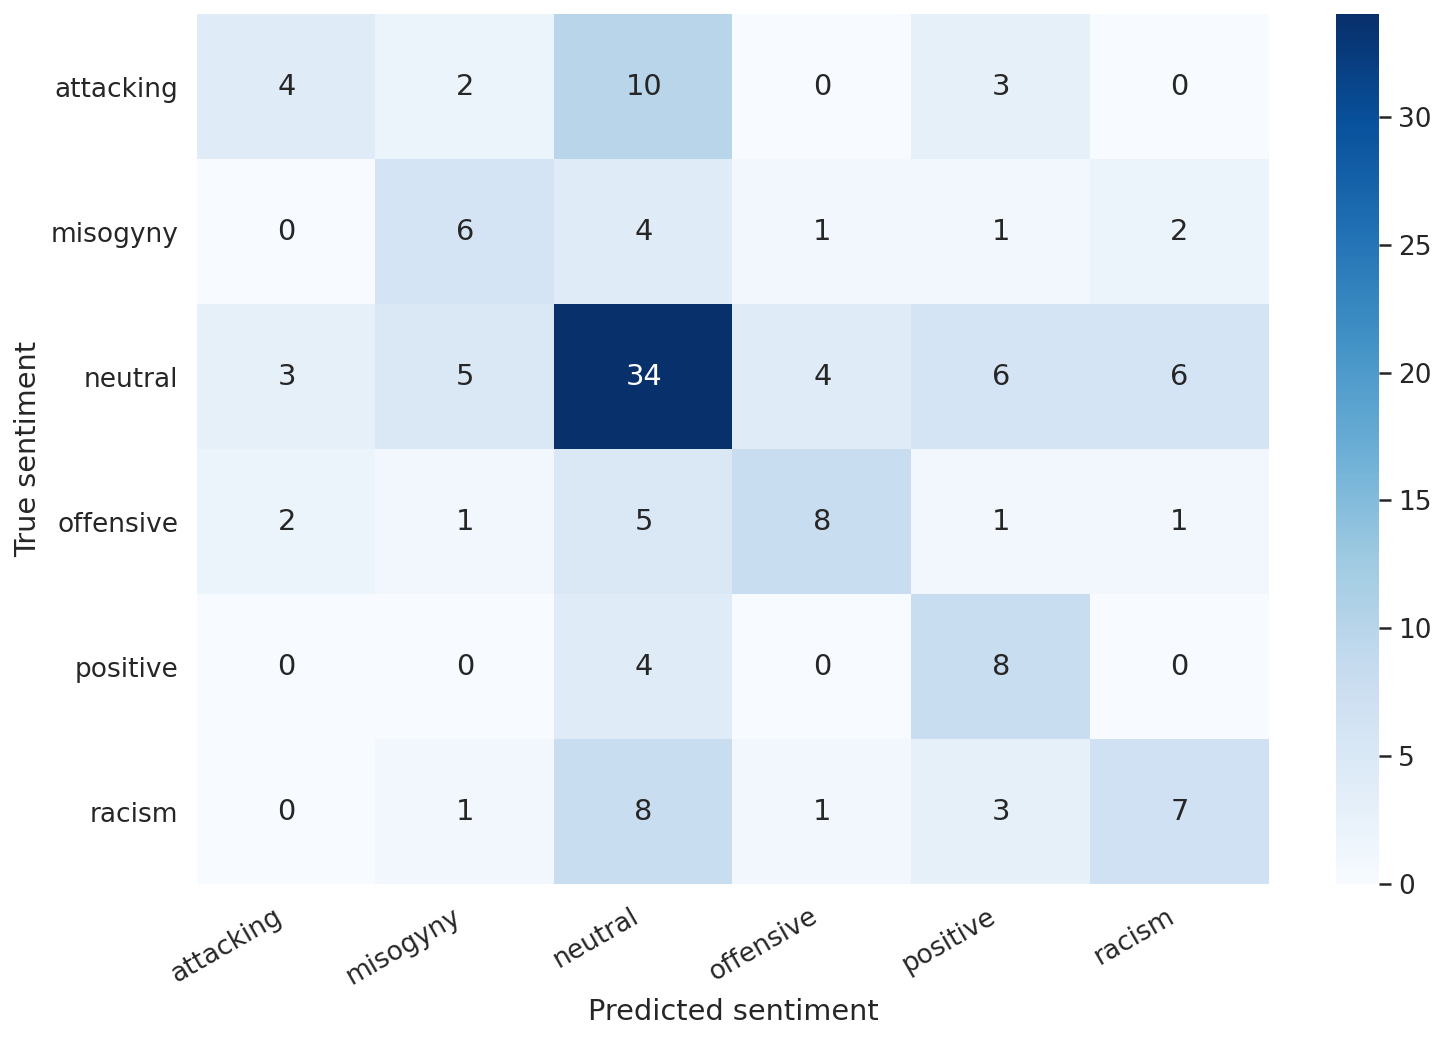

In [ ]:
def show_confusion_matrix(confusion_matrix):

  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")

  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')

  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')

  plt.ylabel('True sentiment')

  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

show_confusion_matrix(df_cm)

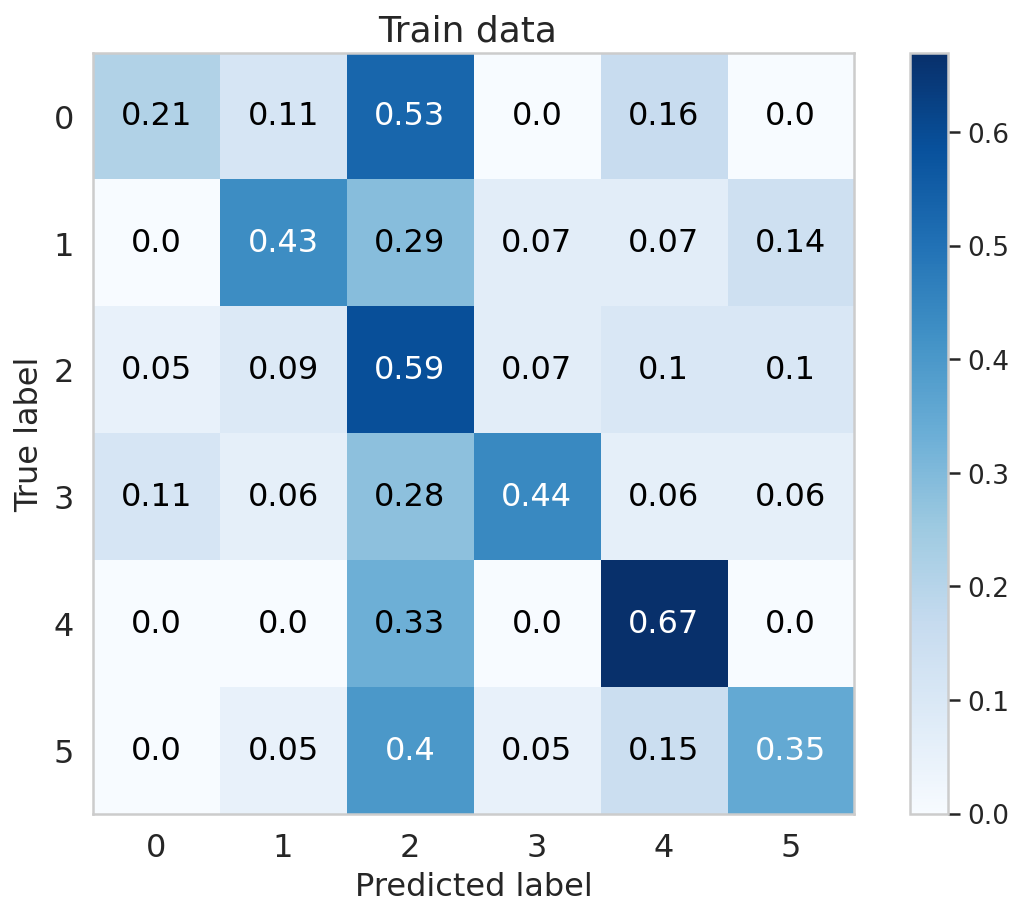

In [ ]:
import scikitplot as skplt 

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(10,7),
    title_fontsize='18',
    text_fontsize='16',
    title ='Train data ',
    cmap='Blues',
    normalize=True
    )
plt.savefig('Bert-test',dpi=300);


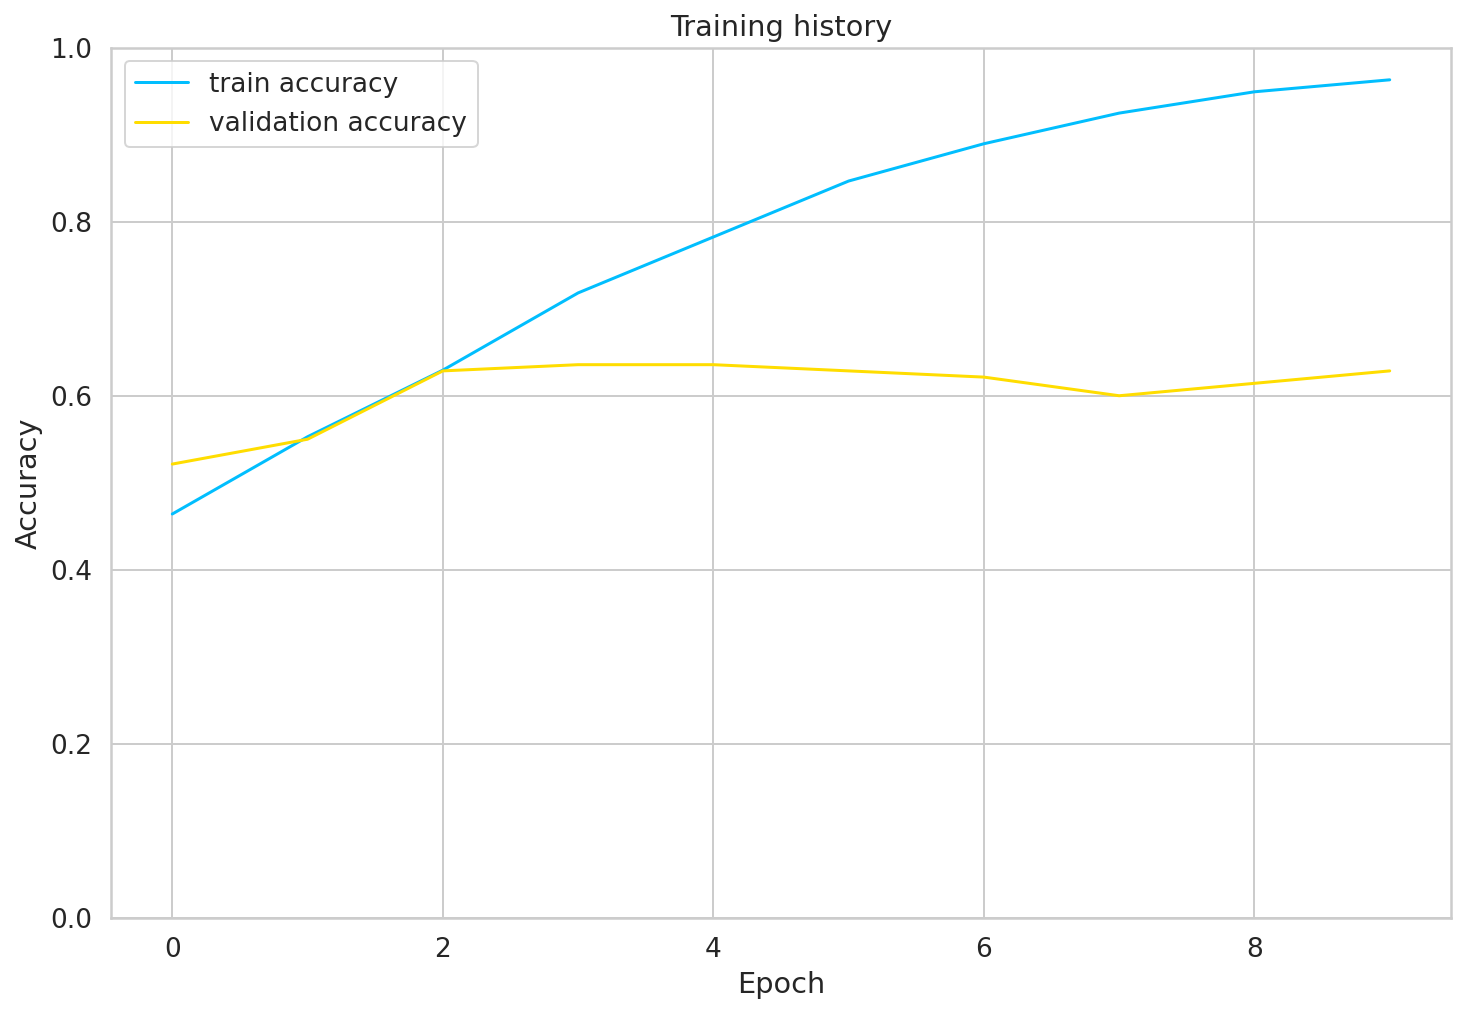

In [ ]:
plt.plot(history['train_acc'], label='train accuracy')

plt.plot(history['val_acc'], label='validation accuracy')

plt.title('Training history')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend()

plt.ylim([0, 1]);
plt.savefig("bert.png",dpi=300)
